## 載入函式庫

In [1]:
#匯入最常用的numpy、pandas和matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 定義問題

In [2]:
#讀取csv檔
insurance_data=pd.read_csv("insurance.csv")


In [3]:
insurance_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 數據準備

In [4]:
#定義x和y
x=insurance_data.drop('charges', axis=1)
y=insurance_data['charges']
#x.head(5)
#y.head(5)

In [5]:
#清洗資料
#把類別資料換成數字
x.replace({'smoker': {'no' : 0, 'yes': 1}}, inplace = True)
x.replace({'sex': {'female' : 0, 'male': 1}}, inplace = True)

#最快的作法：
x_OH = pd.get_dummies(x).reset_index(drop=True)

In [6]:
#資料標準化
#三步驟，宣告它，fit它，transform它
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_OH)
x_nor = sc.transform(x_OH)

In [7]:
#區分訓練集和測試集
from sklearn.model_selection import train_test_split

#區分訓練集和驗證集的函數
x_train, x_test, y_train, y_test = train_test_split(x_nor, y, test_size=0.2, random_state=5566)

## 建立AI模型

In [8]:
#今天上課的模型們
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [19]:
#宣告
model=SVR()

In [20]:
#訓練
model.fit(x_train,y_train)

SVR()

In [21]:
#預測
y_pred = model.predict(x_test)

## 結果評估

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import sklearn
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
R2_score = r2_score(y_test, y_pred)

In [23]:
print("MAE=",MAE)
print("MSE=",MSE)
print("RMSE=",np.sqrt(MSE))
print("R2_SCORE=",R2_score)

MAE= 8571.365964931998
MSE= 164462455.33430275
RMSE= 12824.291611403054
R2_SCORE= -0.1178752916218313


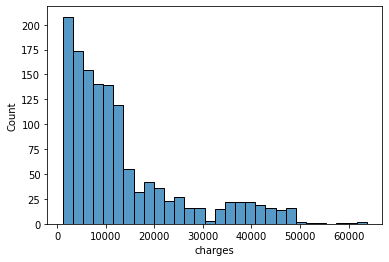

In [13]:
sns.histplot(y);